In [70]:
#Importing libraries. The same will be used throughout the article.
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

path_to_file = "./project_3/house-prices-advanced-regression-techniques/noOutliers.csv"
dataProj = pd.read_csv(path_to_file)
print(dataProj.head())


   MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0              0              0              0              0              0   
1              1              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

     ...      EnclosedPorch  3SsnPorch

In [71]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['SalePrice'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['GrLivArea'],y_pred)
        plt.plot(data['GrLivArea'],data['SalePrice'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['SalePrice'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

/Users/bennettgelly/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.036094e-17
  overwrite_a=True).T


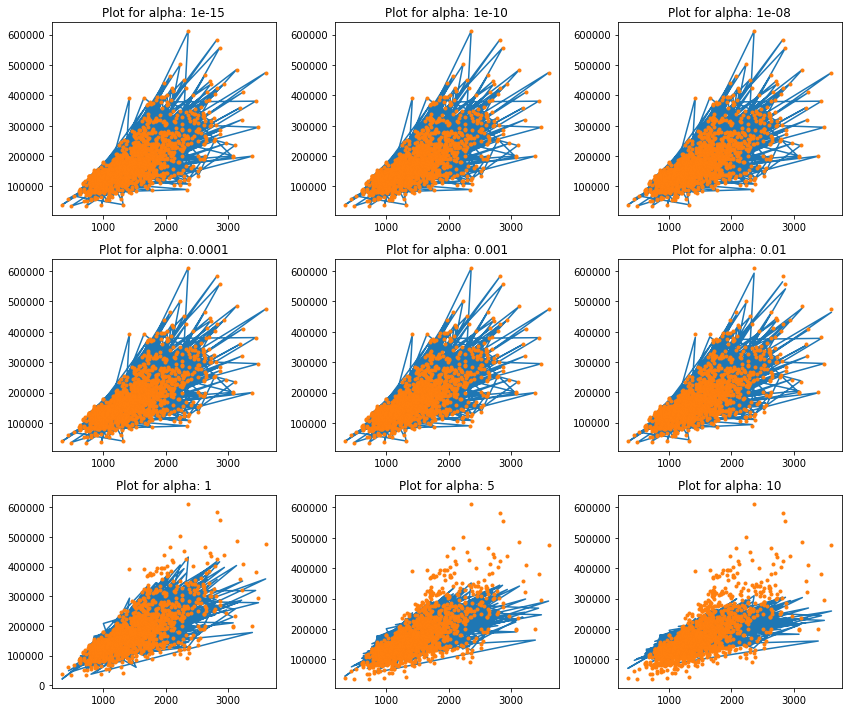

In [72]:
#Initialize predictors to be set of 15 powers of x
predictors=list(dataProj.columns)

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_%s'%i for i in predictors]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:331, 1e-10:332, 1e-8:333, 1e-4:334, 1e-3:335, 1e-2:336, 1:337, 5:338, 10:339}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(dataProj, predictors, alpha_ridge[i], models_to_plot)

In [73]:
coef_matrix_ridge

,rss,intercept,coef_MSSubClass_20,coef_MSSubClass_30,coef_MSSubClass_40,coef_MSSubClass_45,coef_MSSubClass_50,coef_MSSubClass_70,coef_MSSubClass_75,coef_MSSubClass_80,...,coef_EnclosedPorch,coef_3SsnPorch,coef_ScreenPorch,coef_Pool,coef_PoolQC,coef_Shed,coef_MiscVal,coef_MoSold,coef_YrSold,coef_SalePrice
alpha_1e-15,6.58116e-16,-5.7451e-08,3.43555e-12,1.96023e-10,-1.741e-10,4.97543e-10,1.31536e-10,2.05251e-11,4.44011e-11,-6.72836e-11,...,4.73792e-13,8.00283e-13,2.31222e-12,8.73283e-12,-4.80637e-09,1.3503e-10,2.57903e-14,-7.27583e-12,9.80035e-12,1
alpha_1e-10,1.10636e-06,-0.00100662,-6.51481e-07,2.38014e-06,-7.46562e-06,1.65246e-06,2.38921e-06,2.08789e-06,1.56557e-05,-1.8566e-06,...,1.51055e-08,4.85847e-08,5.18409e-08,6.98224e-07,-0.000404481,2.60887e-06,1.06615e-09,-5.04576e-07,-3.8214e-08,1
alpha_1e-08,0.0110633,-0.100658,-6.51143e-05,0.000238035,-0.00074651,0.000165256,0.000238932,0.000208786,0.00156555,-0.000185633,...,1.51052e-06,4.85842e-06,5.18393e-06,6.98215e-05,-0.0404476,0.000260876,1.06614e-07,-5.04573e-05,-3.82198e-06,1
alpha_0.0001,1.102e+06,-1003.22,-0.590759,2.42739,-7.35278,1.67805,2.40164,2.08119,15.3983,-1.78028,...,0.0150134,0.0484898,0.051647,0.687157,-397.803,2.60769,0.00105923,-0.503795,-0.0380076,0.998598
alpha_0.001,1.0648e+08,-9748.78,-1.22859,27.8067,-64.4851,18.3017,24.7776,20.1512,133.761,-12.0076,...,0.142797,0.476651,0.500592,6.0063,-3456.05,25.9362,0.0100357,-4.96672,-0.35855,0.986222
alpha_0.01,7.95614e+09,-78140.7,138.355,340.199,-218.757,95.8052,202.431,127.579,488.942,42.0452,...,1.05366,4.09572,4.0431,25.1291,-13577.1,230.739,0.0723839,-42.8413,-1.26092,0.881294
alpha_1,5.86437e+11,-353729,-30.8851,-2654.05,2854.85,-892.982,12.6259,2137.78,1879.82,-2047.4,...,-0.283449,14.7852,18.7748,10.0571,3177.55,-549.361,0.19616,-37.9772,9.60683,0.156763
alpha_5,1.43845e+12,-178614,12.0306,-3587.41,337.699,-1870.72,-838.648,993.141,2085.5,-1240.23,...,-3.77612,8.18491,11.4574,5.40067,2823.59,-1361.8,-0.0234724,64.942,-49.0699,0.0733699
alpha_10,2.29841e+12,-91514.2,72.2179,-3142.71,-229.368,-2002.75,-996.029,378.76,1448.97,-778.945,...,-4.33385,5.94098,7.91389,3.8318,2143.78,-1218.65,-0.0643489,62.8599,-52.0575,0.0507068
alpha_20,3.53922e+12,-9946.49,97.5176,-2359.47,-384.965,-1687.7,-889.294,25.9212,825.283,-435.505,...,-3.83732,4.00417,4.99373,2.4875,1438.48,-910.465,-0.066641,47.6185,-41.556,0.0327918


In [74]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_MSSubClass_20,coef_MSSubClass_30,coef_MSSubClass_40,coef_MSSubClass_45,coef_MSSubClass_50,coef_MSSubClass_70,coef_MSSubClass_75,coef_MSSubClass_80,...,coef_EnclosedPorch,coef_3SsnPorch,coef_ScreenPorch,coef_Pool,coef_PoolQC,coef_Shed,coef_MiscVal,coef_MoSold,coef_YrSold,coef_SalePrice
alpha_1e-15,6.6e-16,-5.7e-08,3.4e-12,2e-10,-1.7e-10,5e-10,1.3e-10,2.1e-11,4.4e-11,-6.7e-11,...,4.7e-13,8e-13,2.3e-12,8.7e-12,-4.8e-09,1.4e-10,2.6e-14,-7.3e-12,9.8e-12,1
alpha_1e-10,1.1e-06,-0.001,-6.5e-07,2.4e-06,-7.5e-06,1.7e-06,2.4e-06,2.1e-06,1.6e-05,-1.9e-06,...,1.5e-08,4.9e-08,5.2e-08,7e-07,-0.0004,2.6e-06,1.1e-09,-5e-07,-3.8e-08,1
alpha_1e-08,0.011,-0.1,-6.5e-05,0.00024,-0.00075,0.00017,0.00024,0.00021,0.0016,-0.00019,...,1.5e-06,4.9e-06,5.2e-06,7e-05,-0.04,0.00026,1.1e-07,-5e-05,-3.8e-06,1
alpha_0.0001,1.1e+06,-1e+03,-0.59,2.4,-7.4,1.7,2.4,2.1,15,-1.8,...,0.015,0.048,0.052,0.69,-4e+02,2.6,0.0011,-0.5,-0.038,1
alpha_0.001,1.1e+08,-9.7e+03,-1.2,28,-64,18,25,20,1.3e+02,-12,...,0.14,0.48,0.5,6,-3.5e+03,26,0.01,-5,-0.36,0.99
alpha_0.01,8e+09,-7.8e+04,1.4e+02,3.4e+02,-2.2e+02,96,2e+02,1.3e+02,4.9e+02,42,...,1.1,4.1,4,25,-1.4e+04,2.3e+02,0.072,-43,-1.3,0.88
alpha_1,5.9e+11,-3.5e+05,-31,-2.7e+03,2.9e+03,-8.9e+02,13,2.1e+03,1.9e+03,-2e+03,...,-0.28,15,19,10,3.2e+03,-5.5e+02,0.2,-38,9.6,0.16
alpha_5,1.4e+12,-1.8e+05,12,-3.6e+03,3.4e+02,-1.9e+03,-8.4e+02,9.9e+02,2.1e+03,-1.2e+03,...,-3.8,8.2,11,5.4,2.8e+03,-1.4e+03,-0.023,65,-49,0.073
alpha_10,2.3e+12,-9.2e+04,72,-3.1e+03,-2.3e+02,-2e+03,-1e+03,3.8e+02,1.4e+03,-7.8e+02,...,-4.3,5.9,7.9,3.8,2.1e+03,-1.2e+03,-0.064,63,-52,0.051
alpha_20,3.5e+12,-9.9e+03,98,-2.4e+03,-3.8e+02,-1.7e+03,-8.9e+02,26,8.3e+02,-4.4e+02,...,-3.8,4,5,2.5,1.4e+03,-9.1e+02,-0.067,48,-42,0.033
